<pre/>
<pre/>
# Twitter-Hashtags-Like 2-Mode Network Generator
<pre/>


<pre/>
## by Moses Boudourides & Stergios Lenis

The first cell includes the python modules that need to be imported first so that the subsequent part of the script may be executed.

In [21]:
import networkx as nx
import string
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

This script produces a time-dependent two-mode network (bipartite graph) of Twitter users and hashtags.

In the cell below, one needs to specify the following input data:

* n = the number of (Twitter) users.
* m = the number of hashtags included in the tweets that users are sending.
* minhu = the minimum number of hashtags associated with a user (minhu should be less or equal than m).
* maxhu = the maximimum number of hashtags associated with a user (maxhu should be greater or equal than minhu and less or equal than m).
* T = the time periods for for each one of which a random two-mode network of Twitter and hashtags is generated.

In [22]:
n = 10
m = 10
minhu = 4           
maxhu = 8             
T = 12

For each time period and for each user, first, a number of hashtags in the interval [minhu,maxhu] is selected and, subsequently, the edges connecting the user with each one of the selected hashtags are created.

Thus, for each time period, a two-mode network (bipartite graph) is generated, in which the first mode includes users and the second mode includes hashtags.

In [23]:
users = range(n)     
hashtags = [str(j+n) for j in range(m)]
hpu = range(minhu,maxhu) 
per = T              

graph_list = []
for i in range(per):
    G = nx.Graph()
    for i  in users:
        samp = random.choice(hpu)
        sample = random.sample(hashtags,samp)
        for j in sample:
            G.add_edge(j,i)
    graph_list.append(G)

issol = set(users) - set(G.nodes())

For each user, a time period is selected randomly at which this user is activated in order to become an "adopter." This construction results a list (vector) of time periods, toa, at which each user becomes an adopter.

The length of the list (vector) toa is equal to the number of users and hashtags. However, only users (nodes in the first mode) may become adopters, i.e., hashtags (nodes in the second mode) CANNOT be adopters. Therefore, the last m entries of toa should be equal to 0.

In [25]:
toa = []
for i in users:
    if i not in issol:
        toa.append(random.choice(range(per)) ) #+1
    else:
        toa.append(0)
for i in hashtags:
    toa.append(0)

print toa

[6, 5, 5, 4, 10, 0, 8, 7, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Finally, we plot the generated two-mode networks (bipartite graphs) for each time period. The colors of nodes are:

* blue squares are hashtags,
* green circles are users who are nonadopters,
* red circles are users who are adopters.

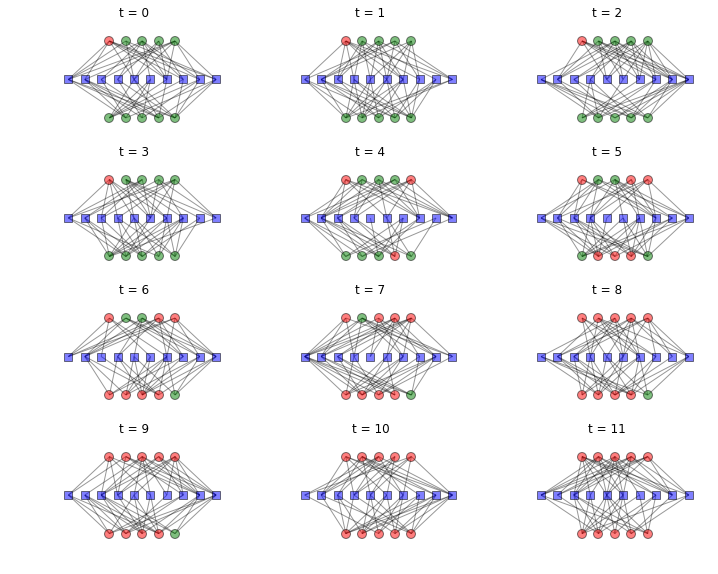

In [26]:
plt.figure(figsize=(12, 12)) 
sAd = set()
for i_g,G in enumerate(graph_list):
    ax = plt.subplot(1+len(graph_list)/3,3,i_g+1)
    from networkx.algorithms import bipartite
    X=set(users)
    Y=set(hashtags)
    x = list(enumerate(X))
    y = list(enumerate(Y))
    B = x[:len(x)/2]
    C = x[len(x)/2:]
    b = len(B)
    c = len(C)
    pos = dict()
    pos.update( (n, (i+(len(y)-b)/2., -1)) for i, n in B ) 
    pos.update( (n, (i, 0)) for i, n in enumerate(Y) )
    pos.update( (n, (i-len(x)/2.+(len(y)-c)/2., 1)) for i, n in C )
    for i in G.nodes():
        if isinstance(i,str):
            continue
        if toa[i] ==i_g:
            sAd.add(i)
    Ad=list(sAd.intersection(set(G.nodes())))
    ns = 80
    nx.draw_networkx_nodes(G,pos=pos,nodelist=Ad,node_size=ns,node_color='r',alpha=0.5) 
    nx.draw_networkx_nodes(G,pos=pos,nodelist=list(set(X) - set(Ad)),node_size=ns,node_color='g',alpha=0.5) 
    nx.draw_networkx_nodes(G,pos=pos,nodelist=Y,node_size=ns,node_shape='s',node_color='b',alpha=0.5) 
    nx.draw_networkx_edges(G,pos=pos,alpha=0.4) 
    sstt = "t = %i" %i_g
    tt=plt.title(sstt,fontsize=12)
    plt.axis('off')
plt.show()

Saving the adjacency matrices of the generated two-mode networks (bipartite graphs) for each time period and the vector toa. 

In [27]:
adj_mat = [nx.adjacency_matrix(G) for G in graph_list]
n_list =[]
u=0
for rw in adj_mat:
    kk =rw.tolist()
    n_list.append(rw.tolist())
fop = open('List_of_Graphs1.txt','w')
for i, li in enumerate(n_list):
    fop.write('[%i\n' %i)
    for ll in li:
        fop.write('%s\n' %str(ll))
    fop.write(']\n')
fop.close()
fop = open('toa1.txt', 'w')
fop.write(str(toa))
fop.close()